# BMI를 예측하는 회귀 수행

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Deeplearning/diabetes.csv", index_col=0)

# 결과 제거 후 BMI 예측
df = df.drop('Outcome', axis=1)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30


# 상관 관계 행렬, 히트맵을 통한 특징 상관관계 분석

### BMI와 상관관계가 가장 높은건 Skinthickness

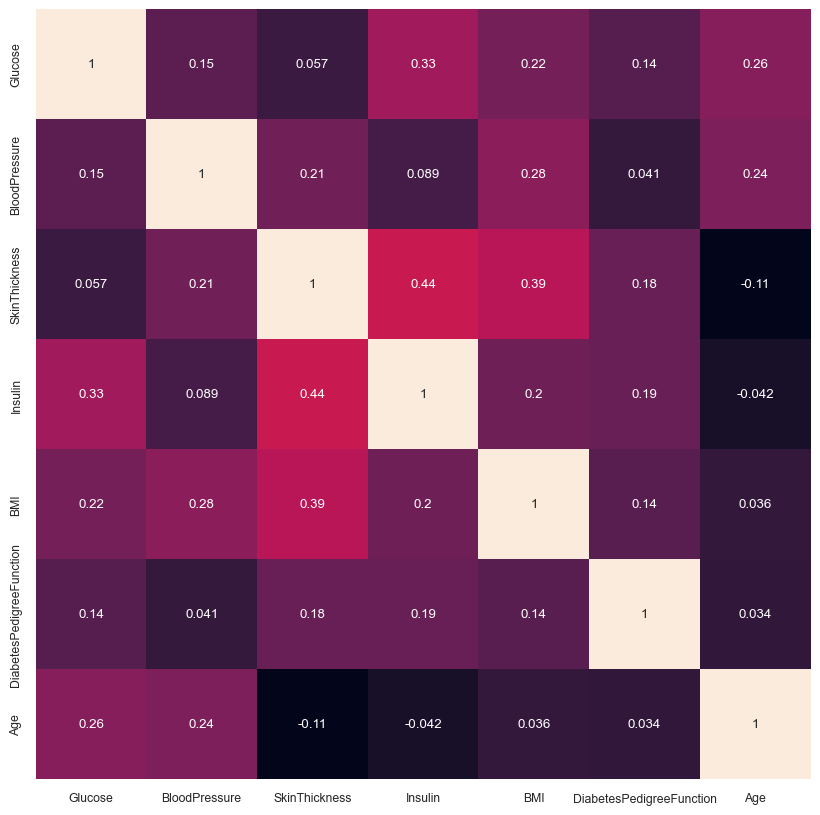

In [11]:

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False) # annot => 계수 표시, cbar => 막대 
plt.show()

## 데이터 준비 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
X = df.drop('BMI',axis=1) #특징 데이터 
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,
6,148,72,35,0,0.627,50
1,85,66,29,0,0.351,31
8,183,64,0,0,0.672,32
1,89,66,23,94,0.167,21
0,137,40,35,168,2.288,33


In [14]:
y = df['BMI'] # 레이블 데이터 
y.head()

Pregnancies
6    33.6
1    26.6
8    23.3
1    28.1
0    43.1
Name: BMI, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 6) (614,)
(154, 6) (154,)


## 회귀 모델 구축 및 훈련 진행. 이후 테스트 데이터로 MSE(손## 회귀 모델 구축 및 훈련 진행. 이후 테스트 데이터로 MSE(손실 함수)로 오차값 산출

# 1. 선형 회귀 알고리즘

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# X_test 값을 넣었을 때의 결과 예측값
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 50.976956320557576
평균제곱근오차 50.976956320557576
평균제곱근오차 50.97695632055757


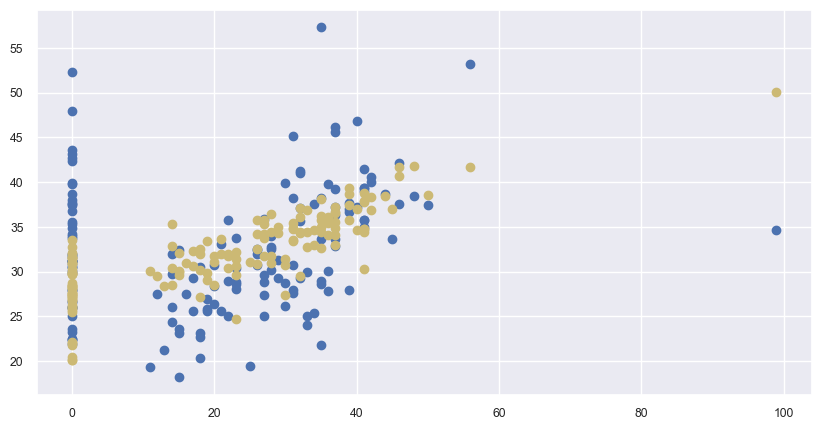

In [19]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test') # 실제 결과(파란색) 
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')  # 결과 예측값 
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

# 2. DecisionTree 회귀 알고리즘 

In [22]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 91.45701298701297


### 산점도 표시 

<function matplotlib.pyplot.show(close=None, block=None)>

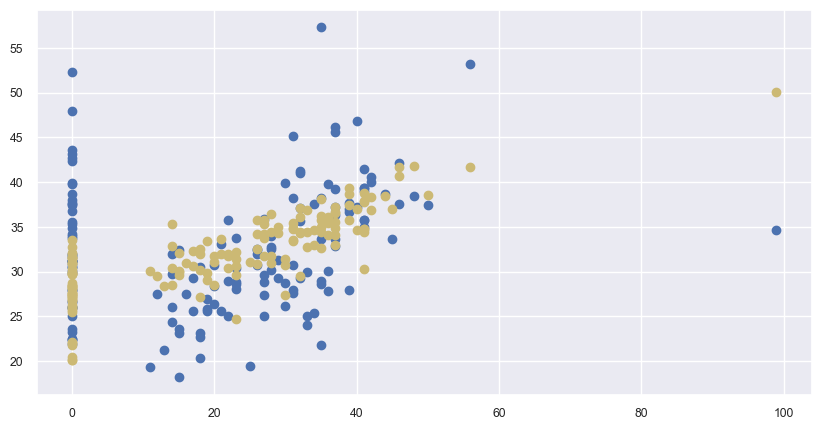

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test') # 실제 결과(파란색) 
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')  # 결과 예측값 
plt.show

# 3. 랜덤 포레스트 알고리즘 

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 44.10191675324676


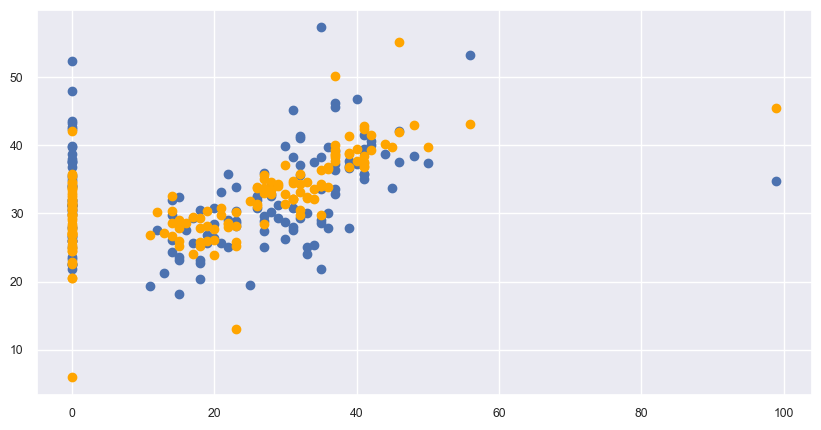

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()     

# 4. SVR

In [31]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 49.352522639731134


## 산점도 

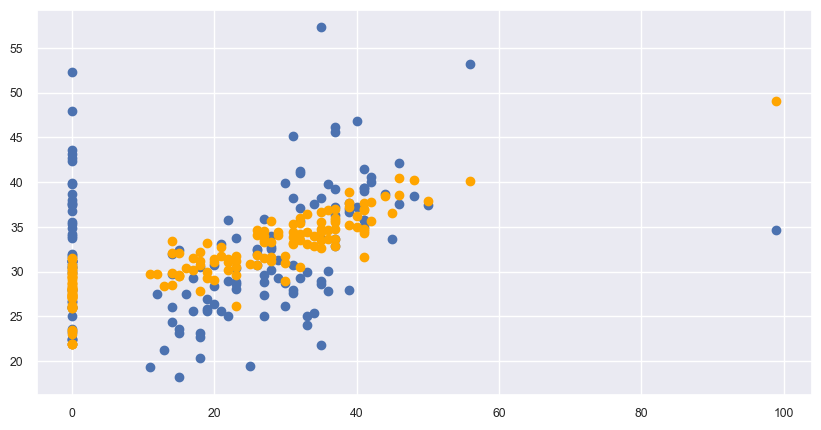

In [34]:

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()    

## 5. 딥러닝 

In [46]:
from keras.models import Sequential
from keras.layers import Dense

# 모델 정의
model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))  # 첫 번째 레이어
model.add(Dense(32, activation='relu'))                # 두 번째 레이어
model.add(Dense(1))                                    # 출력 레이어

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# 예측
y_preds = model.predict(X_test)

# 오차값 산출
print('평균제곱근오차', mean_squared_error(y_preds, y_test))

Epoch 1/100


C:\Users\hunei\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - loss: 428.6569  
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 69.3181
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 50.5384
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 50.8411
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 49.2973
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 49.8113
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 49.4709
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 42.5602
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 52.0557
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 41.1557
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 47.1586
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 43.1429
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 43.8529
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 42.3472
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━

# 산점도 

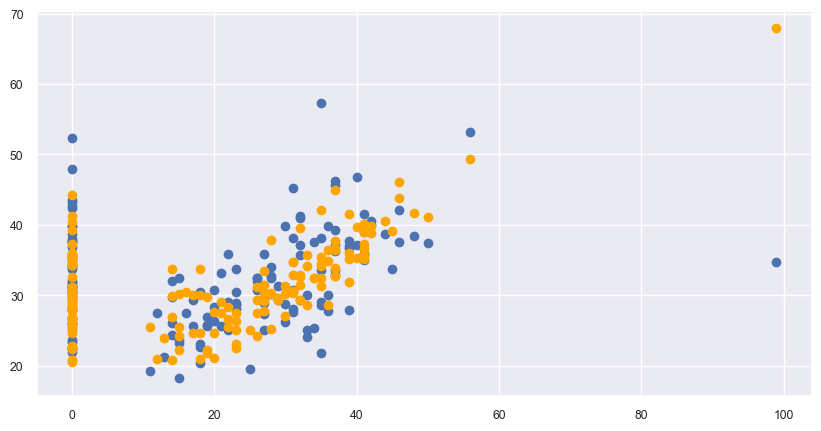

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], y_preds, c='orange', label='y_preds')

plt.show()     